In [ ]:
%cd /content/drive/My Drive/text-review-generation-data2040/src/PPLM

/content/drive/My Drive/text-review-generation-data2040/src/PPLM


In [ ]:
!pwd

/content/drive/My Drive/text-review-generation-data2040/src/PPLM


In [2]:
!pip install -q transformers

In [49]:
!nvidia-smi


Tue May 12 03:59:34 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.87.01    Driver Version: 418.87.01    CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P0    32W /  70W |   1791MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [16]:
!sudo apt-get install python-dev python-pip libcupti-dev
!sudo pip install --upgrade tensorflow-gpu==1.4.0

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libcupti-dev
    100% |████████████████████████████████| 170.1MB 7.1kB/s eta 0:00:011
    100% |████████████████████████████████| 1.7MB 790kB/s eta 0:00:01
    100% |████████████████████████████████| 17.0MB 72kB/s  eta 0:00:011
    100% |████████████████████████████████| 1.3MB 1.0MB/s eta 0:00:01
    100% |████████████████████████████████| 92kB 11.2MB/s ta 0:00:01
    100% |████████████████████████████████| 890kB 1.5MB/s eta 0:00:01
    100% |████████████████████████████████| 307kB 4.0MB/s eta 0:00:01
    100% |████████████████████████████████| 583kB 2.2MB/s eta 0:00:011
  Running setup.py bdist_wheel for html5lib ... done
  Stored in directory: /root/.cache/pip/wheels/50/ae/f9/d2b189788efcf61d1ee0e36045476735c838898eef1cad6e29
Successfully built html5lib
  Found existing installation: six 1.10.0
    Not uninstalling six at /usr/lib/python2.7/dist-packages, outsid

```
In [1]: import torch

In [2]: torch.cuda.current_device()
Out[2]: 0

In [3]: torch.cuda.device(0)
Out[3]: <torch.cuda.device at 0x7efce0b03be0>

In [4]: torch.cuda.device_count()
Out[4]: 1

In [5]: torch.cuda.get_device_name(0)
Out[5]: 'GeForce GTX 950M'

In [6]: torch.cuda.is_available()
Out[6]: True
```

In [27]:
import torch
torch.cuda.current_device()
torch.cuda.device(0)
torch.cuda.device_count()
torch.cuda.get_device_name(0)
torch.cuda.is_available()

True

In [29]:
!git clone https://github.com/GoogleCloudPlatform/tensorflow-inference-tensorrt5-t4-gpu.git

Cloning into 'tensorflow-inference-tensorrt5-t4-gpu'...
remote: Enumerating objects: 17, done.
remote: Total 17 (delta 0), reused 0 (delta 0), pack-reused 17
Unpacking objects: 100% (17/17), done.


In [ ]:
# !python3 run_pplm_discrim_train.py --dataset='generic' --save_model --dataset_fp='/content/drive/My Drive/text-review-generation-data2040/data/Industrial_and_Scientific_5_truncated.tsv' --pretrained_model='gpt2' --epochs=1 --log_interval=100 --batch_size=128
!python3 run_pplm_discrim_train.py --dataset='generic' --save_model --dataset_fp='Clothing_Shoes_and_Jewelry_5_truncated.tsv' --pretrained_model='gpt2' --epochs=10 --log_interval=100 --batch_size=128


Preprocessing generic dataset...
9704140it [00:26, 363773.12it/s]
4709046it [19:16, 4525.99it/s]Train Epoch: 1 [51328/8733726 (1%)]	Loss: 1.067744
Train Epoch: 1 [64128/8733726 (1%)]	Loss: 0.963370
Train Epoch: 1 [76928/8733726 (1%)]	Loss: 0.937476
Train Epoch: 1 [89728/8733726 (1%)]	Loss: 1.105866
Train Epoch: 1 [102528/8733726 (1%)]	Loss: 1.133888
Train Epoch: 1 [115328/8733726 (1%)]	Loss: 0.974853
Train Epoch: 1 [128128/8733726 (1%)]	Loss: 0.854877
Train Epoch: 1 [140928/8733726 (2%)]	Loss: 1.017734


In [18]:
import dask
import dask.dataframe as dd
import pandas as pd

# df = dd.read_csv('/content/drive/My Drive/text-review-generation-data2040/data/Industrial_and_Scientific_5.tsv', sep='\t')
df = dd.read_csv('Industrial_and_Scientific_5.tsv', sep='\t')
# df['text'] = df['text'].astype(str).apply(lambda x: x[:1024])
df['text'] = df['text'].astype(str).apply(lambda x: x[:100])
df['rating'] = df['rating'].astype(int)
# df.to_csv('/content/drive/My Drive/text-review-generation-data2040/data/Industrial_and_Scientific_5_truncated.tsv', sep = '\t', single_file = True, header=False, index=False)
df.to_csv('Industrial_and_Scientific_5_toy.tsv', sep = '\t', single_file = True, header=False, index=False)



/opt/conda/lib/python3.7/site-packages/dask/dataframe/core.py:3076: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=('text', 'object'))

  warnings.warn(meta_warning(meta))


['/home/jupyter/Industrial_and_Scientific_5_toy.tsv']

In [9]:
# not using this anymore
!shuf -n 1000000 Clothing_Shoes_and_Jewelry_5_truncated.tsv >  Clothing_Shoes_and_Jewelry_5_small.tsv

^C


In [1]:
import dask
import dask.dataframe as dd
import pandas as pd
df=pd.to_csv('Clothing_Shoes_and_Jewelry_5_truncated.tsv', sep='\t')

In [10]:
df_sample = df.sample(frac=0.1)
df_sample.to_csv('Clothing_Shoes_and_Jewelry_5_small.tsv', sep = '\t', header=False, index=False)

In [28]:
df_sample['5'].value_counts()

5    602972
4    180484
3     92233
2     48767
1     45958
Name: 5, dtype: int64

In [26]:
x = [ 5,4,3,2,1]
y = [602972, 180484, 92233, 48767,45958]

[val/sum(y) for val in y]

[0.6213554215005143,
 0.18598659953380722,
 0.09504500141176858,
 0.05025380919896044,
 0.047359168354949535]

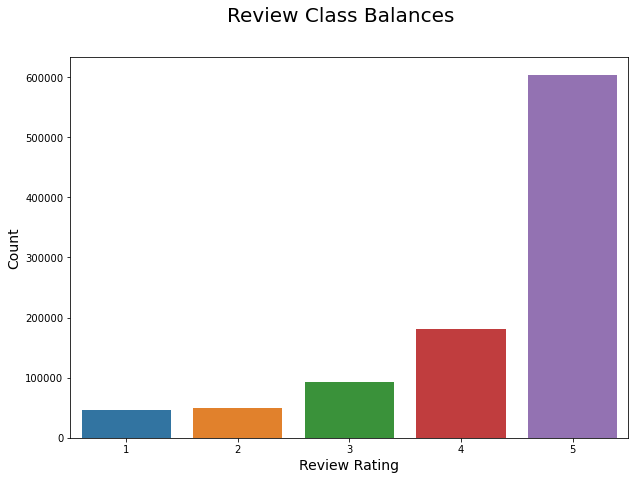

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.suptitle("Review Class Balances", fontsize=20)
plt.xlabel("Review Rating", fontsize=14)
plt.ylabel("Count", fontsize=14)
sns.barplot(x,y)
plt.savefig("class_balances.jpg")

In [11]:
!cat Clothing_Shoes_and_Jewelry_5_small.tsv | wc -l

970507


In [12]:
!python3 run_pplm_discrim_train.py --dataset='generic' --save_model --dataset_fp='Clothing_Shoes_and_Jewelry_5_small.tsv' --pretrained_model='gpt2' --epochs=1 --log_interval=100 --batch_size=64


Preprocessing generic dataset...
970414it [00:01, 524364.59it/s]
970414it [03:58, 4068.94it/s]
5
{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4}
Preprocessed 970414 data points
Data preprocessing took: 255.419s

Epoch 1
Train Epoch: 1 [64/873372 (0%)]	Loss: 5.226584
Train Epoch: 1 [6464/873372 (1%)]	Loss: 0.987452
Train Epoch: 1 [12864/873372 (1%)]	Loss: 1.196961
Train Epoch: 1 [19264/873372 (2%)]	Loss: 0.928686
Train Epoch: 1 [25664/873372 (3%)]	Loss: 1.109504
Train Epoch: 1 [32064/873372 (4%)]	Loss: 1.010450
Train Epoch: 1 [38464/873372 (4%)]	Loss: 1.034265
Train Epoch: 1 [44864/873372 (5%)]	Loss: 0.896333
Train Epoch: 1 [51264/873372 (6%)]	Loss: 0.910013
Train Epoch: 1 [57664/873372 (7%)]	Loss: 1.018288
Train Epoch: 1 [64064/873372 (7%)]	Loss: 0.947400
Train Epoch: 1 [70464/873372 (8%)]	Loss: 0.887884
Train Epoch: 1 [76864/873372 (9%)]	Loss: 1.056939
Train Epoch: 1 [83264/873372 (10%)]	Loss: 0.903180
Train Epoch: 1 [89664/873372 (10%)]	Loss: 0.880834
Train Epoch: 1 [96064/873372 (11%)]	Los

In [29]:
from transformers.modeling_gpt2 import GPT2LMHeadModel
_ = GPT2LMHeadModel.from_pretrained("gpt2")

In [28]:
from run_pplm import run_pplm_example

In [47]:
# discriminator or bag of words
# this contains the checkpointed weights of the trained discriminator: generic_classifier_head_epoch_1.pt
# discrim: generic covers format of first column being label and 2nd column being text, but we can choose discrim to be other trained classes
run_pplm_example(
    cond_text="This food",
    num_samples=3,
    pretrained_model='gpt2',
    discrim_weights='generic_classifier_head_epoch_1.pt',
    discrim_meta='generic_classifier_head_meta.json',
    discrim='generic',
    class_label='1',
#     bag_of_words='Prime',
    length=50,
    stepsize=0.90,
    sample=True,
    num_iterations=1,
    gamma=1,
    gm_scale=0.9,
    kl_scale=0.02,
    verbosity='quiet'
)

= Prefix of sentence =
<|endoftext|>This food

= Unperturbed generated text =
<|endoftext|>This food is delicious! It tastes like real chicken, but has an amazing flavor! It's so good that I don't even have to eat it in a restaurant. It tastes like rice and the texture is so delicious! It's also a great option to

= Perturbed generated text 1 =
<|endoftext|>This food-safety inspector warned this year that the industry warned of health hazards of the tainted rice paste.


The rice paste paste made by B.C. rice producer Bao Dong was used in a fatal accident in Surrey, B.C.,

= Perturbed generated text 2 =
<|endoftext|>This food safety report shows a child died in Myanmar village near Kota village, near Myanmar, Myanmar, on Monday, 11 January. The girl died after she was found dead in her home, a police spokesman said.

The child was taken to the

= Perturbed generated text 3 =
<|endoftext|>This food stamp program began in the late 1990s, when President George H.W. Bush was elected. But n

In [39]:
# discriminator or bag of words
# this contains the checkpointed weights of the trained discriminator: generic_classifier_head_epoch_1.pt
# discrim: generic covers format of first column being label and 2nd column being text, but we can choose discrim to be other trained classes
run_pplm_example(
    cond_text="These shoes",
    num_samples=3,
    pretrained_model='gpt2',
    discrim_weights='generic_classifier_head_epoch_1.pt',
    discrim_meta='generic_classifier_head_meta.json',
    discrim='generic',
    class_label='3',
#     bag_of_words='Prime',
    length=50,
    stepsize=0.90,
    sample=True,
    num_iterations=1,
    gamma=1,
    gm_scale=0.9,
    kl_scale=0.02,
    verbosity='quiet'
)

= Prefix of sentence =
<|endoftext|>These shoes

= Unperturbed generated text =
<|endoftext|>These shoes are rated T for Standard fit and quality. We recommend these shoes for all shoes and all levels of wear.


The first pair of these is an excellent fit with the heel on. This is a true "slip up" shoe that is

= Perturbed generated text 1 =
<|endoftext|>These shoes are made of wool and are worn over the surface.

A soft elastic is attached to the end of the outer of the shoe to the end of the inner lining of the upper of the upper of this shoe. These are the inner lining of

= Perturbed generated text 2 =
<|endoftext|>These shoes are made of polypropylylyleyl acetate (PPAR) and polypropylene poly polyethylene polypropyl acetate (PUPA). The sole was then hand washed with polyethylene.

These shoes were washed with

= Perturbed generated text 3 =
<|endoftext|>These shoes are made from polyester or polypropyl polyhydroxyacetate, and are often not the least as good as the ones that they c

In [55]:
# discriminator or bag of words
# this contains the checkpointed weights of the trained discriminator: generic_classifier_head_epoch_1.pt
# discrim: generic covers format of first column being label and 2nd column being text, but we can choose discrim to be other trained classes
run_pplm_example(
    cond_text="The dress is too small",
    num_samples=5,
    pretrained_model='gpt2',
    discrim_weights='generic_classifier_head_epoch_1.pt',
    discrim_meta='generic_classifier_head_meta.json',
    discrim='generic',
    class_label='5',
#     bag_of_words='Prime',
    length=50,
    stepsize=0.8,
    sample=True,
    num_iterations=1,
    gamma=1,
    gm_scale=0.9,
    kl_scale=0.02,
    verbosity='quiet'
)

= Prefix of sentence =
<|endoftext|>The dress is too small

= Unperturbed generated text =
<|endoftext|>The dress is too small to accommodate a woman who's wearing it. (Getty Images)

The dress is too small to accommodate a woman who's wearing it.

The dress has not fit my body at all. It is too small and the skirt is not

= Perturbed generated text 1 =
<|endoftext|>The dress is too small to fit a size large dress. The dress is also a bit of a bit too short for a man too short to fit a man's full-thigh-back, chest-thigh, and upper-back skirts and shorts that are too

= Perturbed generated text 2 =
<|endoftext|>The dress is too small to fit the dress to your own body to allow you to get the dress it up and make the cut. I don't make any of these any other than if you don't like the dress and don't like it. I like how you're

= Perturbed generated text 3 =
<|endoftext|>The dress is too small for my waist-line size, so I didn't add fabric for size


X to X (3.5 - 4.5 mm):




/ 5 mm x 8 m